In [ ]:
## This data belongs to a supermarket of three different branches .
## I will analyze the store's data by answering questions like :"What are the best 
## selling days and times in the supermarket?" and "What are the most sold products"
## and analyzing the behavior of customers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\dell\Downloads\portfolio\PYTHON PROJECTS\supermarket_sales - Sheet1.csv')
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


# cleaning and manipulating 

In [3]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
# converting the date and time columns to datetime dtype

In [6]:
df['Date'] = pd.to_datetime(df['Date'] , format='%m/%d/%Y')
df['Time'] = pd.to_datetime(df['Time'] , format='%H:%M')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [8]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [9]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


In [10]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


## Gender VS Customer Type

In [ ]:
## average purchase of customer type (member , normal) comparing to 
## gender (male , female)

In [11]:
df1 = df.reset_index().pivot_table(values='Total', index='Customer type', columns='Gender', aggfunc='mean')
df1

Gender,Female,Male
Customer type,,
Member,337.727753,316.985419
Normal,332.233256,305.047581


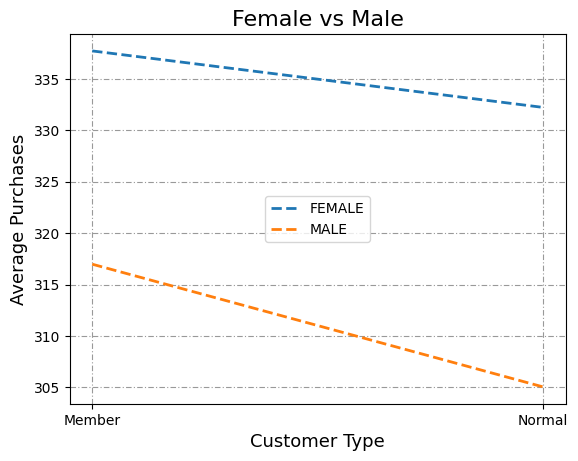

In [12]:
plt.plot(df1, linestyle='dashed',
     linewidth=2, markersize=12)
plt.legend(['FEMALE','MALE'],loc='center')
plt.title("Female vs Male", fontsize='16')
plt.ylabel("Average Purchases",fontsize='13')
plt.xlabel("Customer Type",fontsize='13')
plt.grid(True , color='0.6' , dashes=(5,2,1,2))
plt.show()

# TimeSeries

In [ ]:
## Data Wrangling

In [13]:
df.groupby(['Date'],as_index=False)['Total'].sum()

,Date,Total
0,2019-01-01,4745.1810
1,2019-01-02,1945.5030
2,2019-01-03,2078.1285
3,2019-01-04,1623.6885
4,2019-01-05,3536.6835
...,...,...
84,2019-03-26,1962.5130
85,2019-03-27,2902.8195
86,2019-03-28,2229.4020
87,2019-03-29,4023.2430


In [ ]:
## sales per month

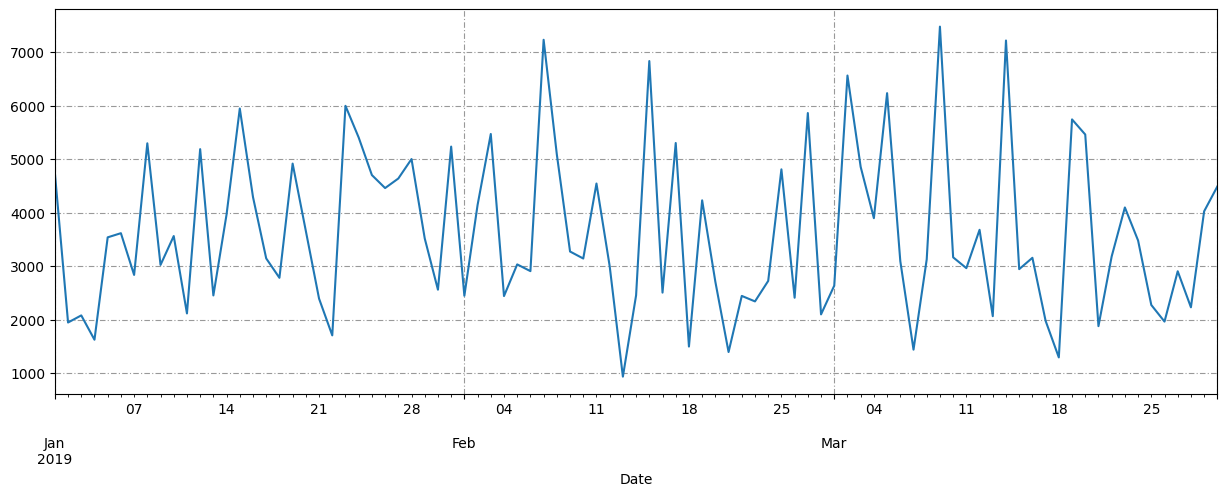

In [17]:
fig_1 = plt.figure(figsize=(15,5)) 
df.groupby(['Date'])['Total'].sum().plot()
plt.grid()
plt.grid(True , color='0.6' , dashes=(5,2,1,2))
plt.show()

In [ ]:
## Sales per hour

In [18]:
df['Hours'] = df['Time'].dt.hour

In [19]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hours
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10


In [20]:
df.groupby(['Hours'],as_index=False)['Total'].sum()

,Hours,Total
0,10,31421.4810
1,11,30377.3295
2,12,26065.8825
3,13,34723.2270
4,14,30828.3990
5,15,31179.5085
6,16,25226.3235
7,17,24445.2180
8,18,26030.3400
9,19,39699.5130


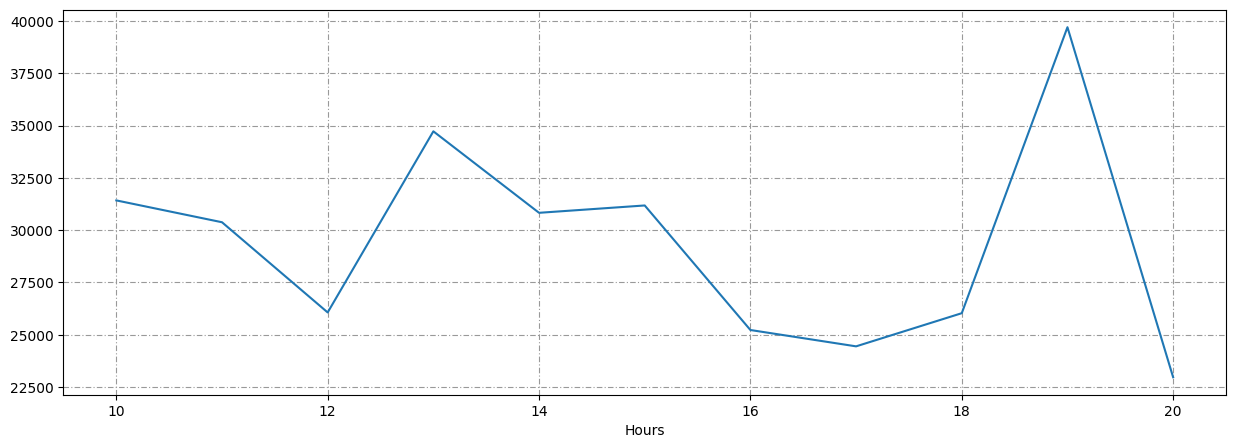

In [21]:
fig_2 = plt.figure(figsize=(15,5))
df.groupby(['Hours'])['Total'].sum().plot()
plt.grid()
plt.grid(True , color='0.6' , dashes=(5,2,1,2))
plt.show()

## Payment

In [ ]:
## in what payment method customers buy more (Cash , Ewallet , Credit card)

In [22]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [23]:
pay_meth = df.groupby(['Payment'])['Total'].sum()
pay_meth

Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Total, dtype: float64

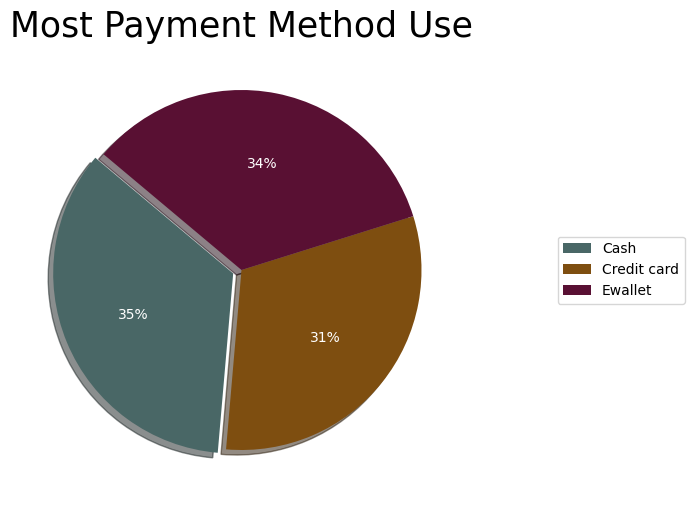

In [28]:
import random
fig_3 = plt.figure(figsize=(8,5),dpi=100)
axes_3 = fig_3.add_axes([0.1,0.1,0.9,0.9])
axes_3.set_title('Most Payment Method Use',fontsize=25)
# pie chart
types = {'Cash' : '3' , 'Credit card' : '4' , 'Ewallet' : '2'}
colors = []
for i in range(4):
    rgp = (random.uniform(0,.5),random.uniform(0,.5),random.uniform(0,.5))
    colors.append(rgp)
explode = [0] * 3
explode[0] = 0.05
wedges , texts , autotexts = plt.pie(pay_meth , explode=explode ,colors=colors , autopct='%1.0f%%'
                                    , shadow = True , startangle=140 , textprops=dict(color='w'))
plt.legend(wedges , types , loc='right' , bbox_to_anchor=(1 , 0 , .5 , 1))

In [ ]:
## Payment distribution in all branches

In [29]:
df.groupby(['Branch','Payment'])['Payment'].count()

Branch  Payment    
A       Cash           110
        Credit card    104
        Ewallet        126
B       Cash           110
        Credit card    109
        Ewallet        113
C       Cash           124
        Credit card     98
        Ewallet        106
Name: Payment, dtype: int64

Text(0.5, 1.0, 'Payment distribution in all branches')

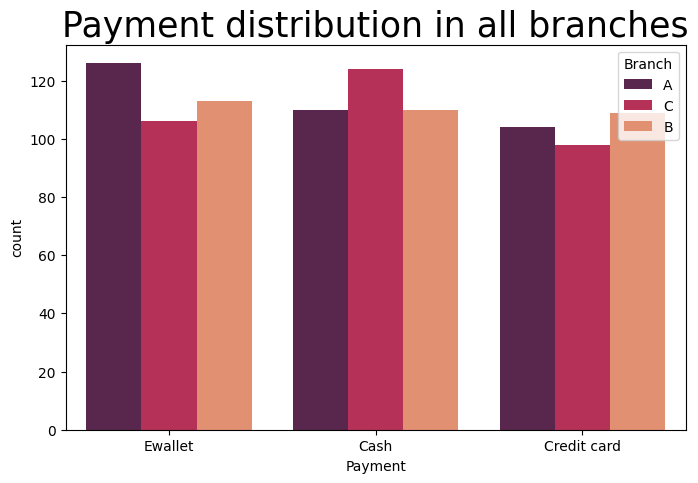

In [30]:
fig_4 = plt.figure(figsize=(8,5),dpi=100)
ax_4 = sns.countplot(x = 'Payment' , hue='Branch' , data=df, palette='rocket')
ax_4.set_title(label = "Payment distribution in all branches", fontsize= 25)

## products

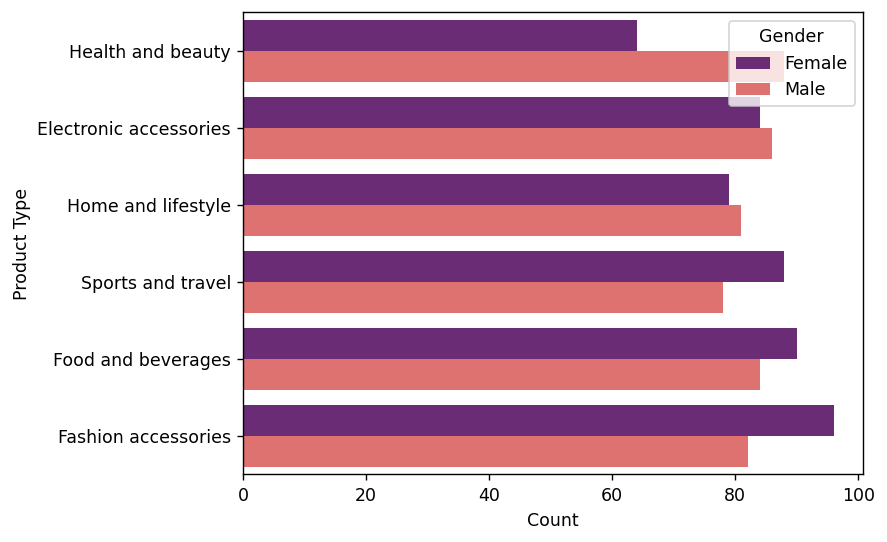

In [31]:
df.groupby(['Gender']). agg({'Total':'sum'})
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Gender", data = df,palette=('magma')) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

In [ ]:
## most products sales in different branches

In [32]:
df.groupby(['Branch','Product line']).agg({'Total':'sum'})

Total
Branch Product line                      
A      Electronic accessories  18317.1135
       Fashion accessories     16332.5085
       Food and beverages      17163.1005
       Health and beauty       12597.7530
       Home and lifestyle      22417.1955
       Sports and travel       19372.6995
B      Electronic accessories  17051.4435
       Fashion accessories     16413.3165
       Food and beverages      15214.8885
       Health and beauty       19980.6600
       Home and lifestyle      17549.1645
       Sports and travel       19988.1990
C      Electronic accessories  18968.9745
       Fashion accessories     21560.0700
       Food and beverages      23766.8550
       Health and beauty       16615.3260
       Home and lifestyle      13895.5530
       Sports and travel       15761.9280

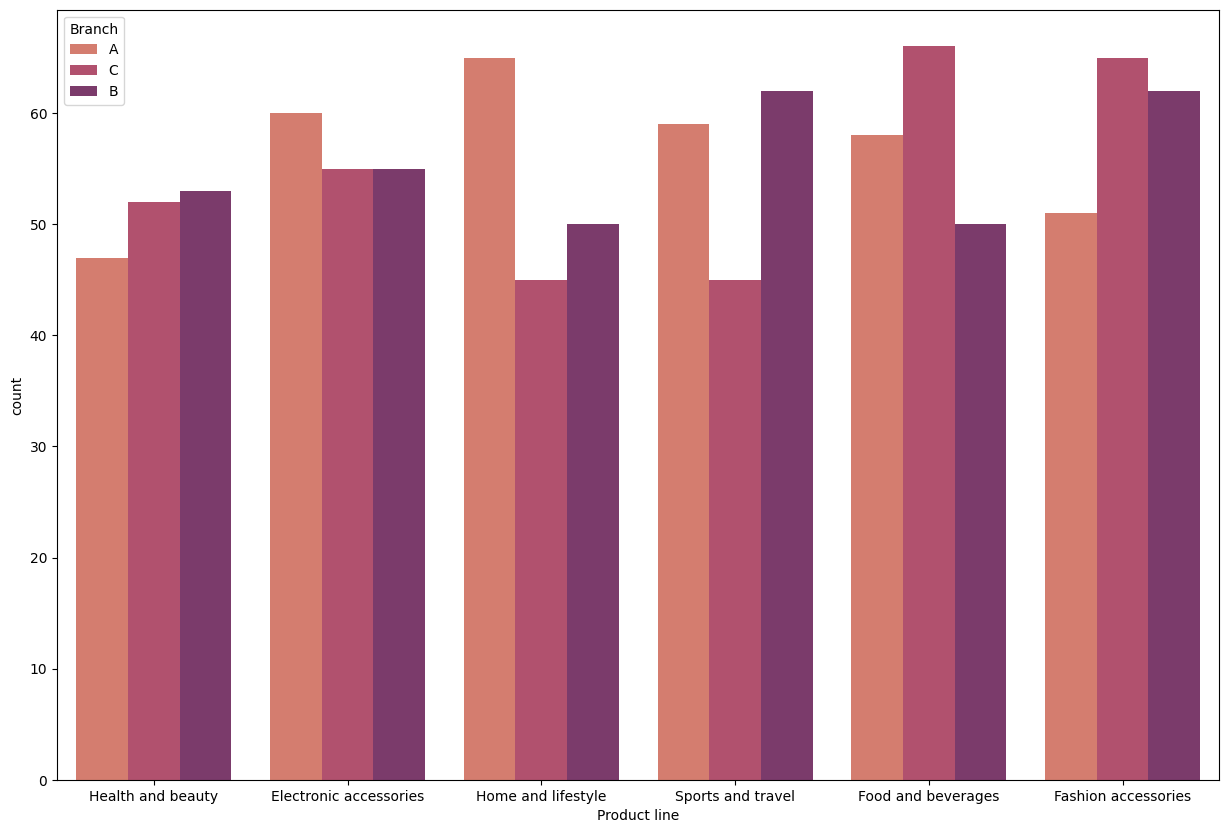

In [33]:
fig_5 = plt.figure(figsize=(15,10),dpi=100)
ax_5 = sns.countplot(x = 'Product line' , hue='Branch' , data=df, palette='flare')